# <span style="color:#336699">Introduction to the FWeather</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:gabriel.sansigolo@inpe.br">gabriel.sansigolo@inpe.br</a>
    <br/><br/>
    Last Update: Nov 13, 2025
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the FWeather to create creating <em>multidimensional arrays</em> from satellite imagery.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Sansigolo, G.; Ferreira, K. R.; Queiroz, G. R.; Marujo, R. F. B.<a href="http://www.google.com" target="_blank">simplecube: a python package for creating multidimensional arrays from satellite imagery
    </div>
</div>

In [ ]:
!pip install fweather

In [ ]:
from fweather import data_cube

In [3]:
stac_url = "https://data.inpe.br/bdc/stac/v1"

In [4]:
samet_temp_cube=data_cube(
    stac_url=stac_url,
    collection="samet_daily-1",
    start_date="2024-01-01",
    end_date="2024-12-31",
    bbox="-47.2797,-17.0725,-45.4779,-15.4485",
    bands=["tmean"]
)

samet_temp_cube

Fetching... : 100%|██████████| 366/366 [00:00<00:00, 1004.62 scenes/s]


<xarray.Dataset> Size: 3MB
Dimensions:  (lon: 36, lat: 33, time: 366)
Coordinates:
  * lon      (lon) float64 288B -47.25 -47.2 -47.15 -47.1 ... -45.6 -45.55 -45.5
  * lat      (lat) float64 264B -17.05 -17.0 -16.95 ... -15.55 -15.5 -15.45
  * time     (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
Data variables:
    tmed     (time, lat, lon) float64 3MB 22.92 22.77 22.77 ... 22.85 22.95

In [23]:
selected_time = '2024-08-01'

cube_2d = samet_temp_cube['tmed'].sel(time=selected_time)

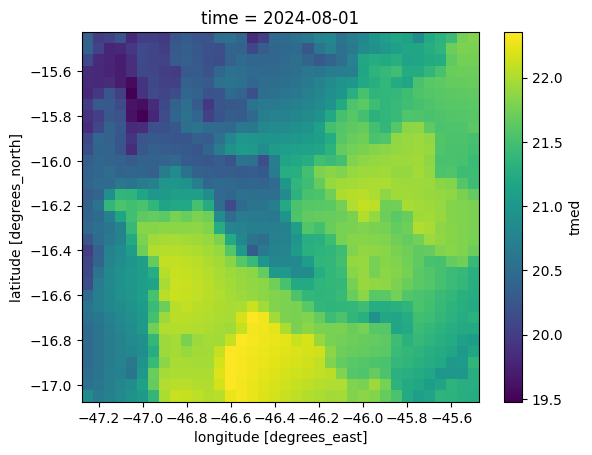

In [24]:
import matplotlib.pyplot

cube_2d.plot()

In [25]:
import rioxarray

output_filepath = "samet_daily"+"-"+selected_time+"-"+"tmed.tif"

cube_2d.rio.to_raster(output_filepath)

print(f"\nSuccessfully saved slice to {output_filepath}!")


Successfully saved slice to samet_daily-2024-08-01-tmed.tif!
